In [1]:
%pip install pandas nltk textblob matplotlib wordcloud

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 2.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ranja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ranja\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


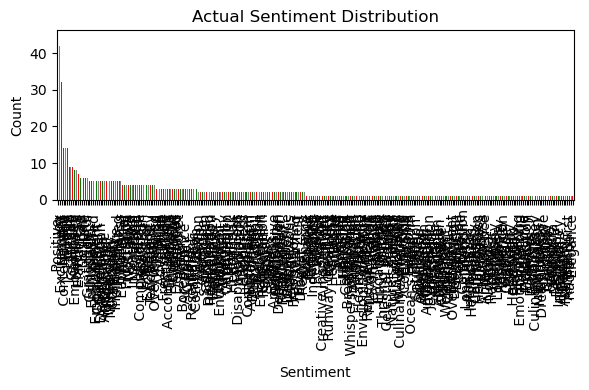

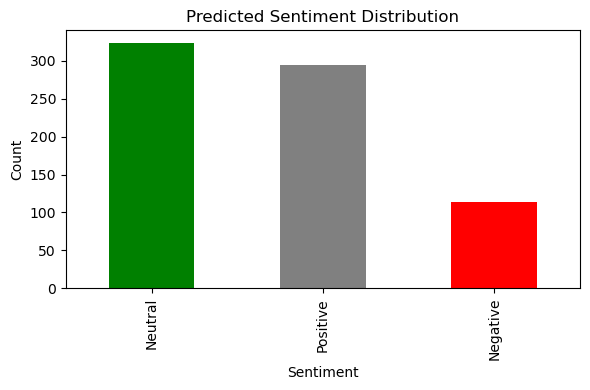

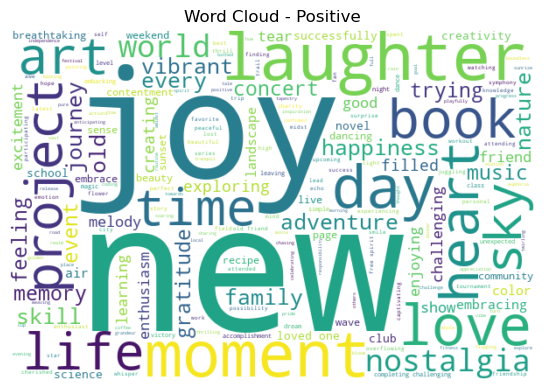

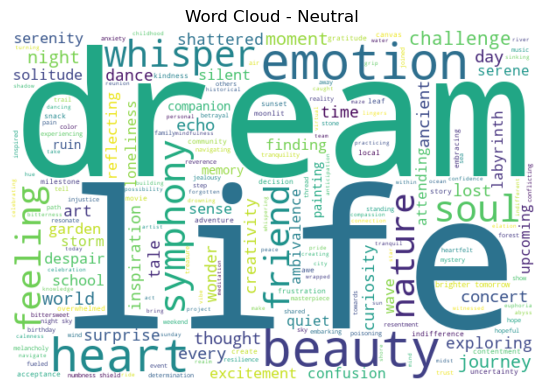

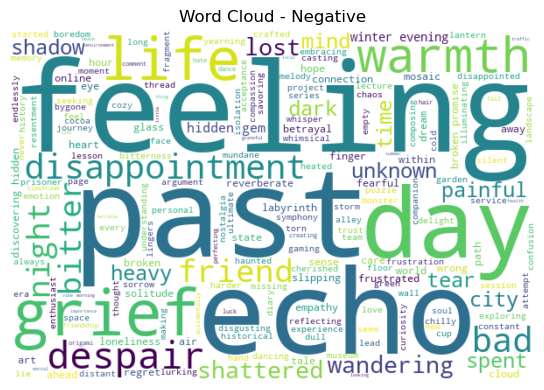

In [14]:
# Required libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset
df = pd.read_csv('C:\\Users\\ranja\\OneDrive\\Desktop\\3) Sentiment dataset.csv')

# Keep only relevant columns
df = df[['Text', 'Sentiment']].dropna()

# Clean text preprocessing
def preprocess(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    tokenizer = RegexpTokenizer(r'\w+')  # replaces word_tokenize
    tokens = tokenizer.tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(lemmatized)

df['clean_text'] = df['Text'].apply(preprocess)

# Optional: Compare with TextBlob sentiment
def get_sentiment(text):
    if not text.strip():
        return 'Neutral'
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['predicted_sentiment'] = df['clean_text'].apply(get_sentiment)

# Sentiment distribution (actual)
plt.figure(figsize=(6, 4))
df['Sentiment'].value_counts().plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Actual Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Sentiment distribution (predicted)
plt.figure(figsize=(6, 4))
df['predicted_sentiment'].value_counts().plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Predicted Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Generate WordClouds by sentiment
for sentiment in ['Positive', 'Neutral', 'Negative']:
    subset = df[df['predicted_sentiment'] == sentiment]
    text = " ".join(subset['clean_text'])
    if text.strip():
        wc = WordCloud(width=600, height=400, background_color='white').generate(text)
        plt.figure(figsize=(6, 4))
        plt.imshow(wc, interpolation='bilinear')
        plt.title(f'Word Cloud - {sentiment}')
        plt.axis('off')
        plt.tight_layout()
        plt.show()
